This Note book is for the assignment of EEG classification. 

Author: Saurabh nale

Email: saurabhnale9@gmail.com

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os

In [1]:
data_folder = '/kaggle/input/eegdata/data'

In [70]:
# we are analyzing for the following bands whose frequency range are given in bracketes. 

bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 12),
    'Beta': (12, 30),
    'Gamma': (30, 100)
}

In [71]:



def calculate_band_power(psd, freqs, fmin, fmax):
    idx = np.logical_and(freqs >= fmin, freqs <= fmax)
    return np.mean(psd[:, idx], axis=1)

def process_edf(file_path):
    raw = mne.io.read_raw_edf(file_path, preload=True)
    
    print(f"Channels before dropping: {raw.ch_names}")
    
    # Drop the last two channels (ECG and annotation)
    channels_to_keep = raw.ch_names[:-2]
    raw.pick_channels(channels_to_keep)
    
    print(f"Channels after dropping: {raw.ch_names}")
    
    # Calculate PSD
    psd, freqs = raw.compute_psd(fmin=1, fmax=100, n_fft=2048, n_overlap=0, n_per_seg=None).get_data(return_freqs=True)
    
    print(f"PSD shape: {psd.shape}, Freqs shape: {freqs.shape}")
    
    # Calculate band powers
    band_powers = {band: calculate_band_power(psd, freqs, fmin, fmax) 
                   for band, (fmin, fmax) in bands.items()}
    
    return band_powers, raw.ch_names

In [72]:
subject_id = f"Subject00"
rest_file = f"{subject_id}_1.edf"
task_file = f"{subject_id}_2.edf"


In [73]:
rest_path = os.path.join(data_folder, rest_file)
task_path = os.path.join(data_folder, task_file)


In [74]:
rest_path

'/kaggle/input/eegdata/data/Subject00_1.edf'

In [75]:
if os.path.exists(rest_path) and os.path.exists(task_path):
    rest_data, ch_names = process_edf(rest_path)
    task_data, _ = process_edf(task_path)
    print(f"Processed {subject_id}")
else:
    print(f"Missing files for {subject_id}")
    exit()

Extracting EDF parameters from /kaggle/input/eegdata/data/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Channels before dropping: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Channels after dropping: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz']
Effective window size : 4.096 (s)
PSD shape: (19, 405), Freqs shape: (405,)
Extracting EDF parameters from /kaggle/input/eegdata/data/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading

In [76]:
print("\nRest data:")
for band, power in rest_data.items():
    print(f"{band}: {power}")

print("\nTask data:")
for band, power in task_data.items():
    print(f"{band}: {power}")

# calculate differences
differences = {band: task_data[band] - rest_data[band] for band in bands}


print("\nDifferences:")
for band, diff in differences.items():
    print(f"{band}: {diff}")


Rest data:
Delta: [5.58688928e-12 8.46429747e-12 9.28238123e-12 1.03892356e-11
 1.72421417e-11 1.16535898e-11 1.29040982e-11 7.97123270e-12
 1.18455432e-11 1.00203450e-11 9.88673705e-12 9.10062418e-12
 8.34236452e-12 9.16268523e-12 8.58753429e-12 1.04116124e-11
 1.02724567e-11 2.09339344e-11 9.82325958e-12]
Theta: [2.28676821e-12 2.96430789e-12 3.79459091e-12 4.49629232e-12
 3.97791634e-12 3.57250316e-12 4.86329448e-12 3.14476490e-12
 3.81608915e-12 4.51428655e-12 2.61017361e-12 3.04536488e-12
 3.35995048e-12 3.64947778e-12 3.50358649e-12 3.97628677e-12
 4.47720388e-12 5.62931609e-12 3.62718985e-12]
Alpha: [7.98436168e-12 9.73123175e-12 1.26533276e-11 1.28018061e-11
 8.53339114e-12 9.20422013e-12 1.06869645e-11 1.05107578e-11
 1.12460711e-11 1.09961171e-11 6.99827701e-12 1.76422832e-11
 1.06048698e-11 1.78091548e-11 1.55912658e-11 4.42909952e-11
 1.27745643e-11 1.21880787e-11 1.12721953e-11]
Beta: [8.23513095e-13 1.11402070e-12 1.37866867e-12 1.46215084e-12
 1.11263646e-12 1.28242451e

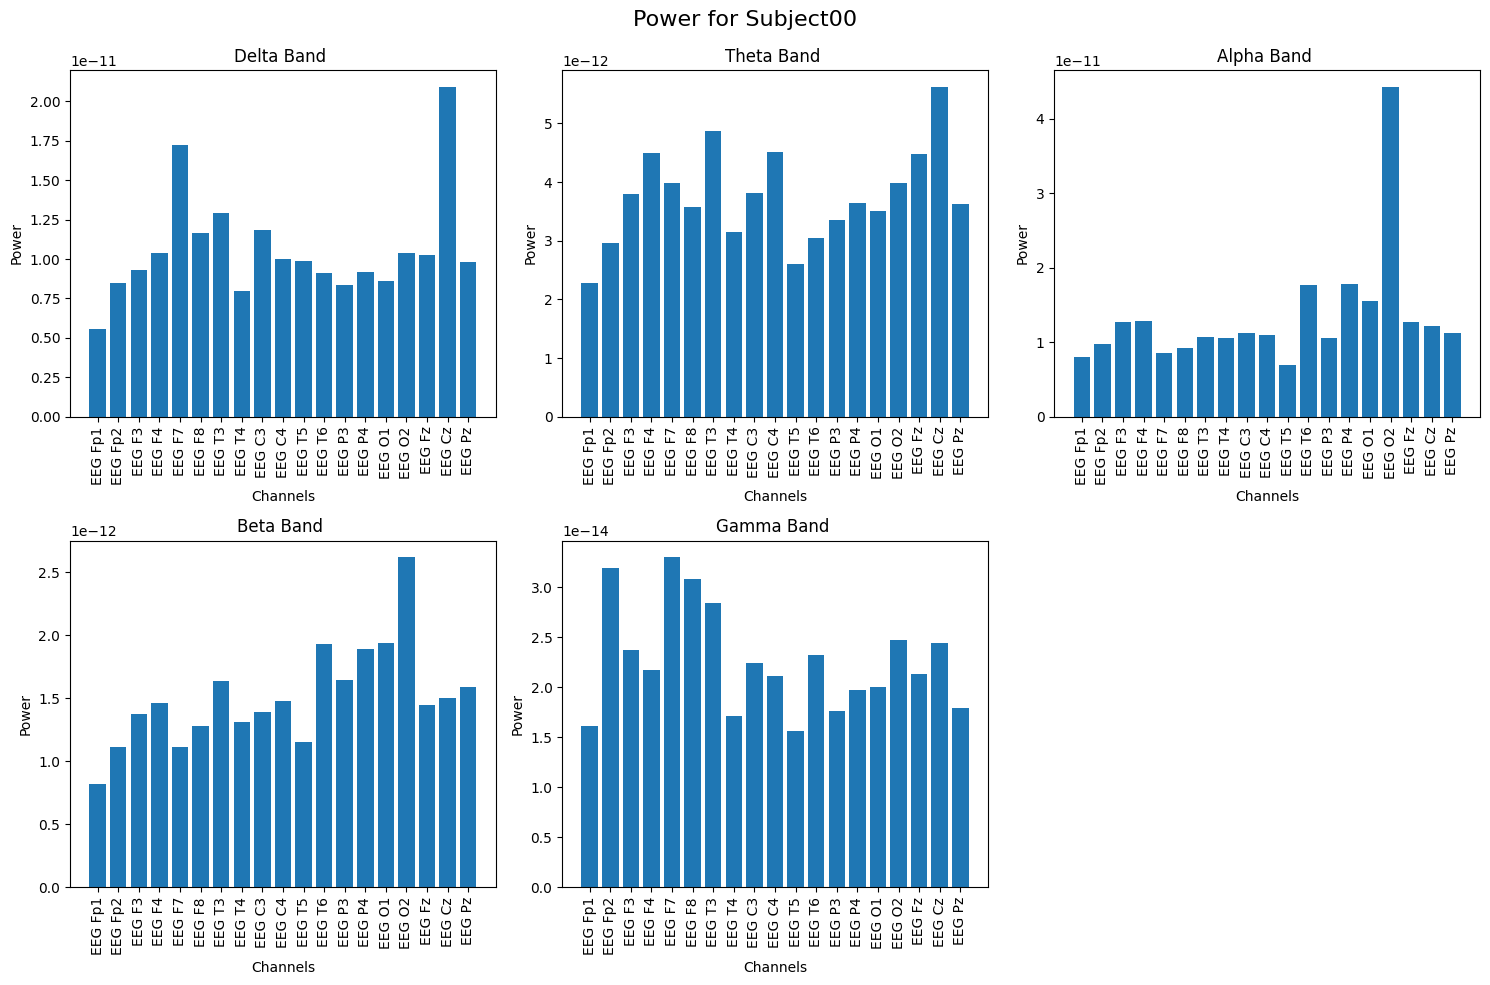

In [77]:
plt.figure(figsize=(15, 10))

for i, (band, power) in enumerate(rest_data.items(), 1):
    plt.subplot(2, 3, i)
    plt.bar(range(len(ch_names)), power)
    plt.title(f'{band} Band ')
    plt.xlabel('Channels')
    plt.ylabel('Power')
    plt.xticks(range(len(ch_names)), ch_names, rotation=90)
    plt.tight_layout()

plt.suptitle(f'Power for {subject_id}', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

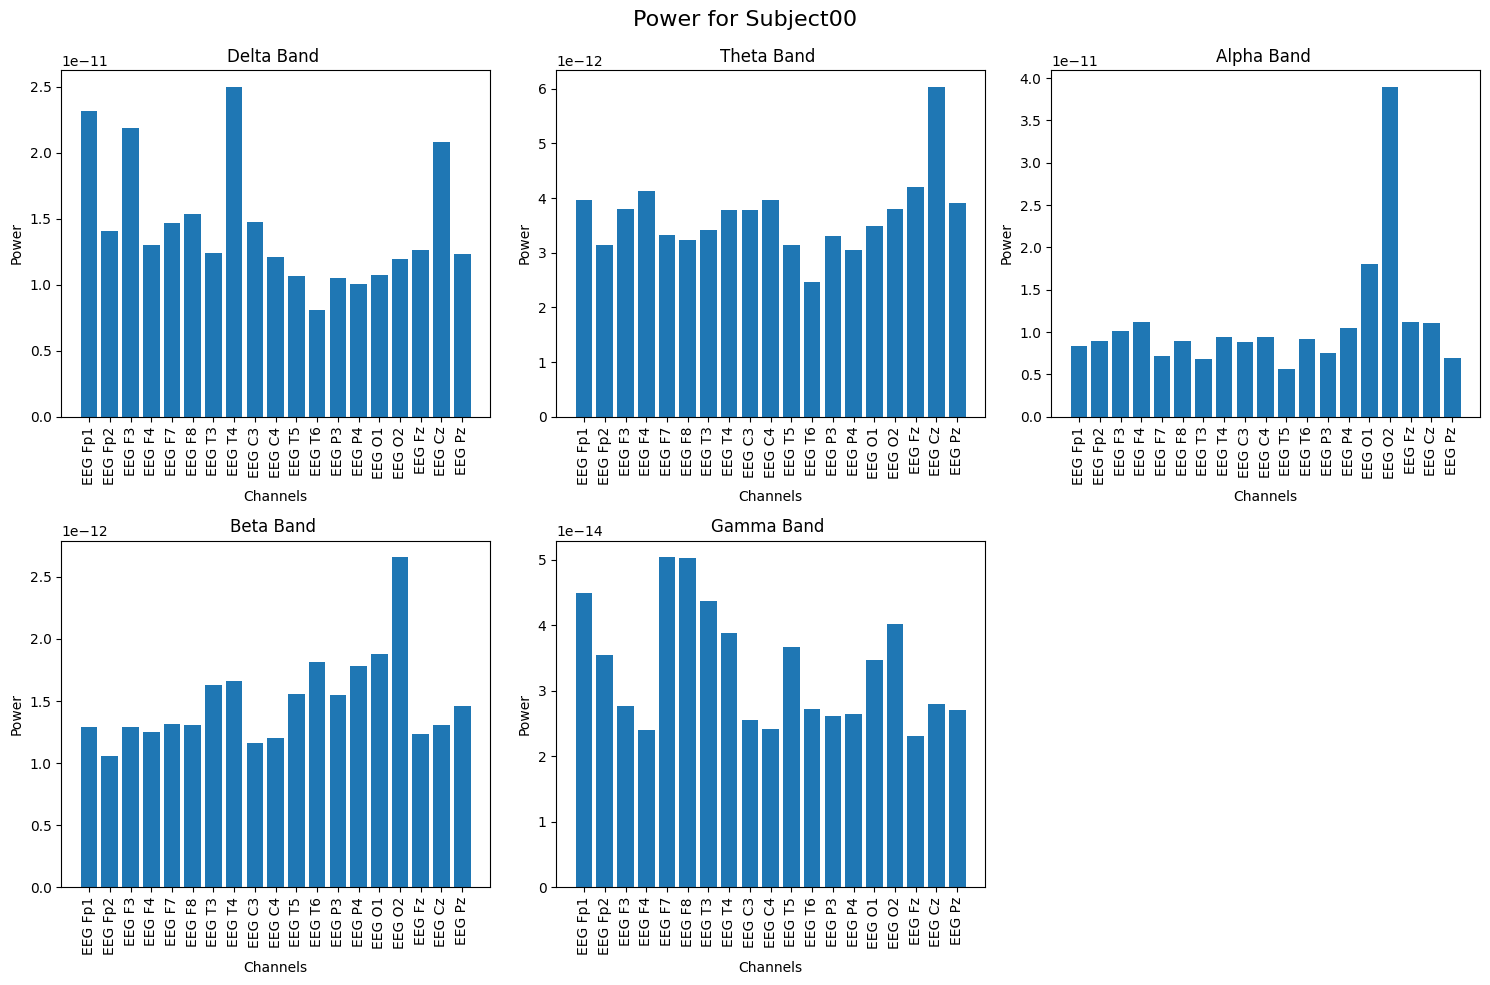

In [78]:
plt.figure(figsize=(15, 10))

for i, (band, power) in enumerate(task_data.items(), 1):
    plt.subplot(2, 3, i)
    plt.bar(range(len(ch_names)), power)
    plt.title(f'{band} Band ')
    plt.xlabel('Channels')
    plt.ylabel('Power')
    plt.xticks(range(len(ch_names)), ch_names, rotation=90)
    plt.tight_layout()

plt.suptitle(f'Power for {subject_id}', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

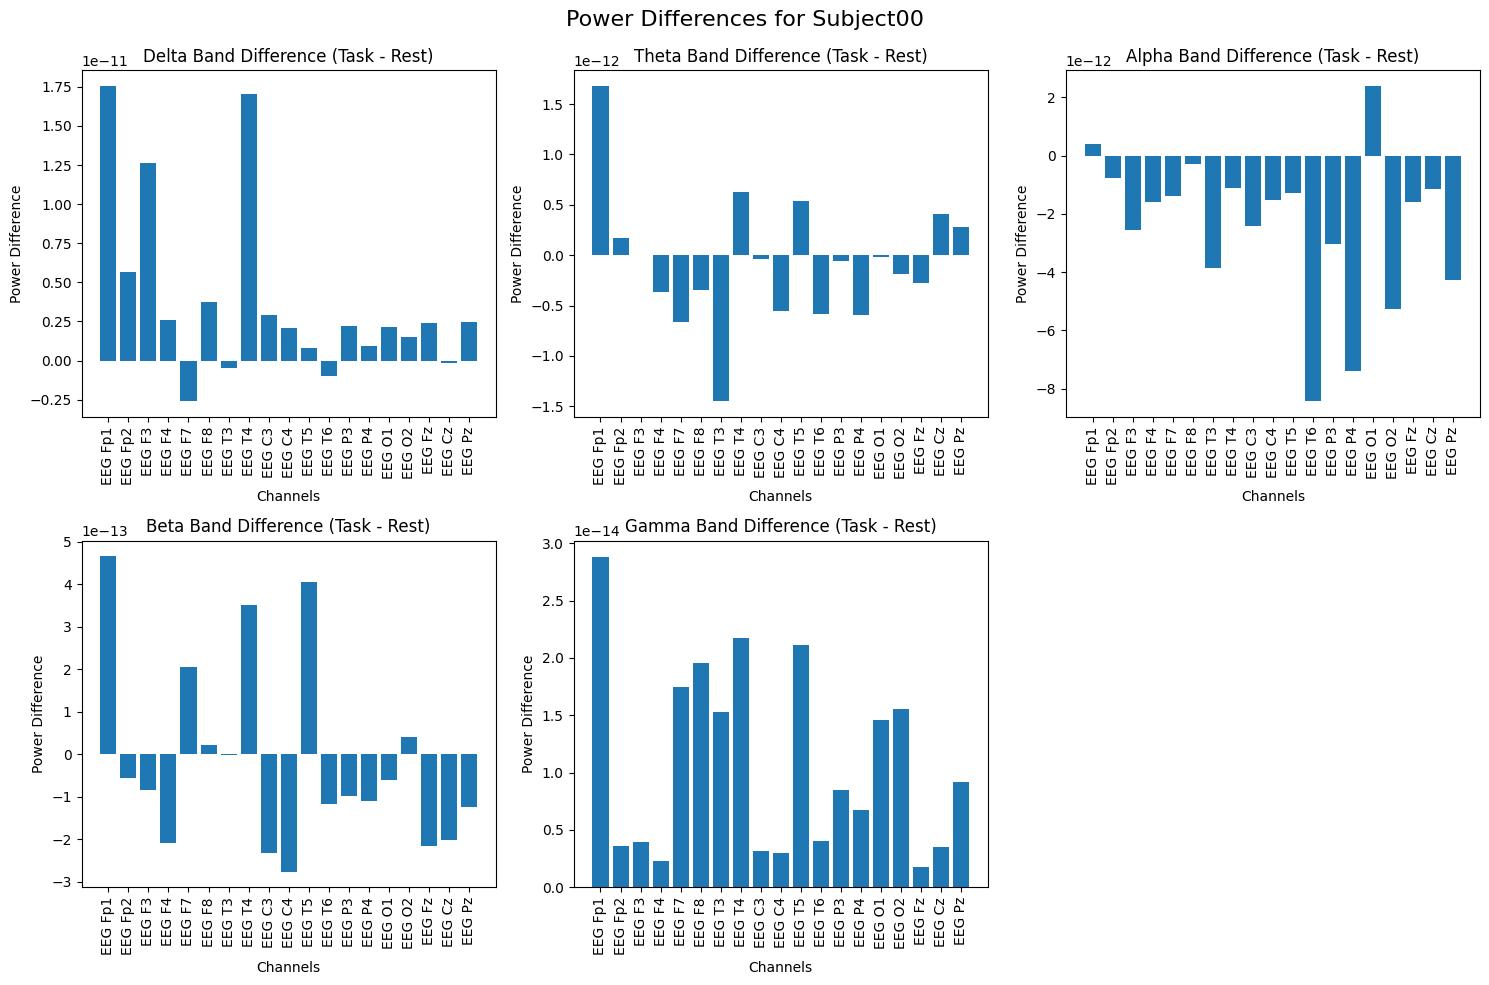

In [79]:
plt.figure(figsize=(15, 10))

for i, (band, diff) in enumerate(differences.items(), 1):
    plt.subplot(2, 3, i)
    plt.bar(range(len(ch_names)), diff)
    plt.title(f'{band} Band Difference (Task - Rest)')
    plt.xlabel('Channels')
    plt.ylabel('Power Difference')
    plt.xticks(range(len(ch_names)), ch_names, rotation=90)
    plt.tight_layout()

plt.suptitle(f'Power Differences for {subject_id}', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Understanding from bar plots:**

Delta band: Which is often associated with deep sleep. decrease during the task indicates that there is alertness.

Theta band: Which is associated with drowsiness but also with memory and emotional regulation. increase during the task sugests mental effort or working memory load. 

Alpha band: typically it is prominant when alert, and low when there is some task.

Beta band: the incresed channel suggests there is mental load

Gamma band: An increase might indicate complex cognitive processing or intense focus.


In [80]:
for band in bands:
    mean_diff = np.mean(differences[band])
    std_diff = np.std(differences[band])
    print(f"{band}: Mean difference = {mean_diff:.30f}, Std = {std_diff:.30f}")

# print channels with maximum difference for each band
for band in bands:
    max_channel_index = np.argmax(np.abs(differences[band]))
    max_difference = differences[band][max_channel_index]
    print(f"{band}: Max difference at {ch_names[max_channel_index]} = {max_difference:.30f}")

Delta: Mean difference = 0.000000000003816206739244217847, Std = 0.000000000005528766934198127162
Theta: Mean difference = -0.000000000000074415162719738717, Std = 0.000000000000631671235974824031
Alpha: Mean difference = -0.000000000002377220828991103152, Std = 0.000000000002522235050276850984
Beta: Mean difference = -0.000000000000015594976144319903, Std = 0.000000000000213924983365827446
Gamma: Mean difference = 0.000000000000010735292847302740, Std = 0.000000000000008020334191283731
Delta: Max difference at EEG Fp1 = 0.000000000017568510024619337625
Theta: Max difference at EEG Fp1 = 0.000000000001681950036023620475
Alpha: Max difference at EEG T6 = -0.000000000008426747675162721215
Beta: Max difference at EEG Fp1 = 0.000000000000466043019025336869
Gamma: Max difference at EEG Fp1 = 0.000000000000028790621304304184


# More analysis


In [81]:
def compute_psd(raw, fmin=1, fmax=100, n_fft=2048):
    psd, freqs = mne.time_frequency.psd_welch(raw, fmin=fmin, fmax=fmax, n_fft=n_fft, n_overlap=n_fft//2, n_per_seg=None)
    return psd, freqs

def calculate_band_power(psd, freqs, fmin, fmax):
    idx = np.logical_and(freqs >= fmin, freqs <= fmax)
    return np.mean(psd[:, idx], axis=1)

def process_edf(file_path):
    raw = mne.io.read_raw_edf(file_path, preload=True)
    
    #last two channels are ecg and annotations so we are dropping them.
    channels_to_keep = raw.ch_names[:-2]
    raw.pick_channels(channels_to_keep)
    
    #calculate psd
    spectrum = raw.compute_psd(method='welch', fmin=1, fmax=100, n_fft=2048)
    psd, freqs = spectrum.get_data(return_freqs=True)
    
    #calculate band powers
    band_powers = {band: np.mean(psd[:, (freqs >= fmin) & (freqs <= fmax)], axis=1) 
                   for band, (fmin, fmax) in bands.items()}
    
    return psd, freqs, band_powers, raw.ch_names

In [82]:
if os.path.exists(rest_path) and os.path.exists(task_path):
    rest_psd, rest_freqs, rest_powers, ch_names = process_edf(rest_path)
    task_psd, task_freqs, task_powers, _ = process_edf(task_path)
    print(f"Processed {subject_id}")
else:
    print(f"Missing files for {subject_id}")
    exit()

Extracting EDF parameters from /kaggle/input/eegdata/data/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.096 (s)
Extracting EDF parameters from /kaggle/input/eegdata/data/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Effective window size : 4.096 (s)
Processed Subject00


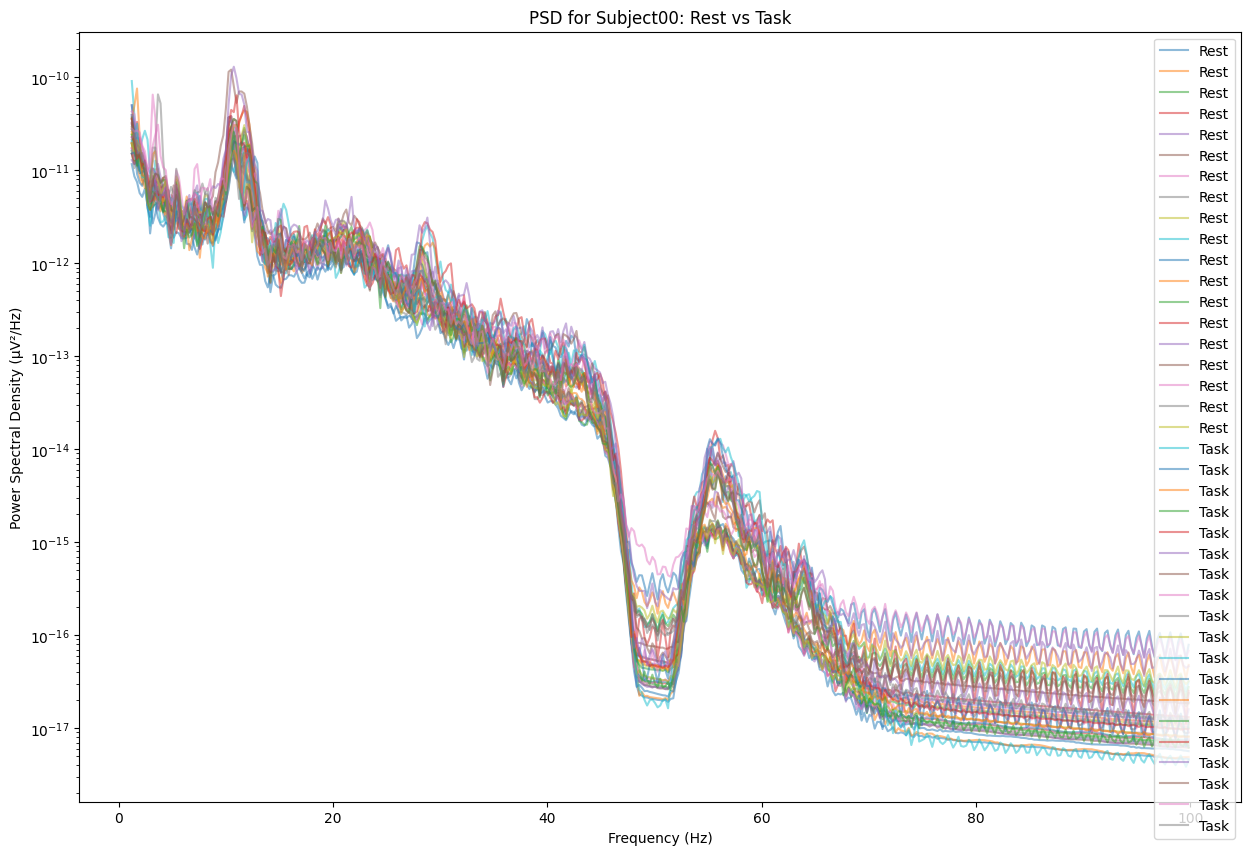

In [83]:
plt.figure(figsize=(15, 10))
plt.semilogy(rest_freqs, rest_psd.T, alpha=0.5, label='Rest')
plt.semilogy(task_freqs, task_psd.T, alpha=0.5, label='Task')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title(f'PSD for {subject_id}: Rest vs Task')
plt.legend()
plt.show()

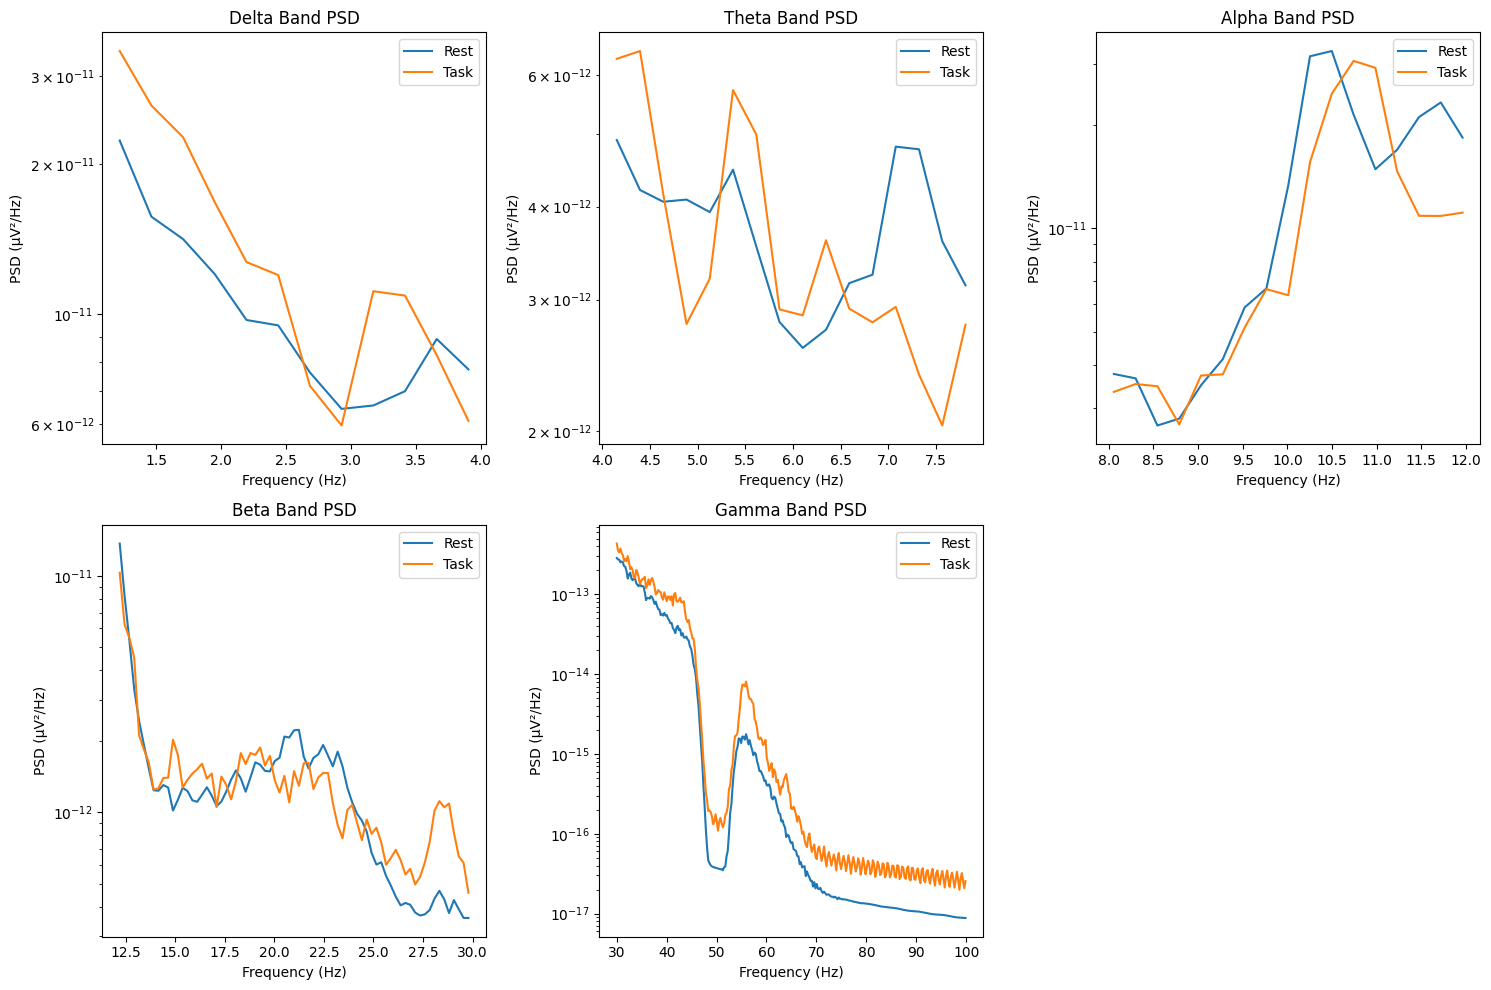

In [87]:
plt.figure(figsize=(15, 10))
for i, (band, (fmin, fmax)) in enumerate(bands.items(), 1):
    plt.subplot(2, 3, i)
    rest_band_psd = np.mean(rest_psd[:, (rest_freqs >= fmin) & (rest_freqs <= fmax)], axis=0)
    task_band_psd = np.mean(task_psd[:, (task_freqs >= fmin) & (task_freqs <= fmax)], axis=0)
    freq_band = rest_freqs[(rest_freqs >= fmin) & (rest_freqs <= fmax)]
    plt.semilogy(freq_band, rest_band_psd, label='Rest')
    plt.semilogy(freq_band, task_band_psd, label='Task')
    plt.title(f'{band} Band PSD')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('PSD (µV²/Hz)')
    plt.legend()
plt.tight_layout()
plt.show()

From the subplots we can see the brain activity is high for delta, theta, beta and gamma bands for task. Wherever the alpha band is low for task. 

In [89]:
for band in bands:
    rest_power = np.mean(rest_powers[band])
    task_power = np.mean(task_powers[band])
    power_change = (task_power - rest_power) / rest_power * 100
    print(f"{band}:")
    print(f"  Rest: {rest_power:.15f} µV²/Hz")
    print(f"  Task: {task_power:.15f} µV²/Hz")
    print(f"  Change: {power_change:.15f}%")


Average Power in each band:
Delta:
  Rest: 0.000000000010625 µV²/Hz
  Task: 0.000000000014442 µV²/Hz
  Change: 35.916179085304783%
Theta:
  Rest: 0.000000000003753 µV²/Hz
  Task: 0.000000000003679 µV²/Hz
  Change: -1.982752359016539%
Alpha:
  Rest: 0.000000000013343 µV²/Hz
  Task: 0.000000000010966 µV²/Hz
  Change: -17.816033320518056%
Beta:
  Rest: 0.000000000001511 µV²/Hz
  Task: 0.000000000001495 µV²/Hz
  Change: -1.032111088324277%
Gamma:
  Rest: 0.000000000000023 µV²/Hz
  Task: 0.000000000000033 µV²/Hz
  Change: 47.339576986725532%


# Model Building


In [3]:
import mne
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2024-07-07 10:25:13.583697: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 10:25:13.583806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 10:25:13.709190: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
def load_data(file_path):
    raw = mne.io.read_raw_edf(file_path, preload=True)
    #drop the last two channels
    channels_to_keep = raw.ch_names[:-2]
    raw.pick_channels(channels_to_keep)
    data = raw.get_data()
    return data

The task signal is of 1 minute long compare to rest which is 3 minutes. For the sake of training we are segmenting our data to 1 minutes. so we will segment each rest signal till 31000 points.

In [ ]:
X = []
y = []

#for the 35 subjets we will assign a for rest data and 2 for task data
for subject in range(35):  
    for condition in [1, 2]:  
        file_name = f"Subject{subject:02d}_{condition}.edf"
        file_path = os.path.join(data_folder, file_name)
        
        if os.path.exists(file_path):
            data = load_data(file_path)
            # Truncate to shortest length
            data = data[:, :31000]
            data = (data - np.mean(data)) / np.std(data)
            X.append(data)
            y.append(0 if condition == 1 else 1)  # 0 for rest 1 for task
        else:
            print(f"File not found: {file_path}")

Extracting EDF parameters from /kaggle/input/eegdata/data/Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /kaggle/input/eegdata/data/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /kaggle/input/eegdata/data/Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Extracting EDF parameters from /kaggle/input/eegdata/data/Subject01_2.edf...
EDF file detected
Setting channel i

In [7]:
#converting the data to numpy array
X = np.array(X)
y = np.array(y)

In [7]:
X.shape

(70, 19, 31000)

In [32]:
X[1][1][1]

-0.25521421748956424

In [ ]:
#splitting the data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#converting labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Data shape:", X.shape)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

In [34]:
X_train = np.transpose(X_train, (0, 2, 1))
X_test = np.transpose(X_test, (0, 2, 1))

In [35]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (56, 31000, 19)
Test data shape: (14, 31000, 19)


In [36]:
n_timepoints, n_features = X_train.shape[1], X_train.shape[2]
n_classes = y_train.shape[1]  # this should be 2 as rest and  task

In [37]:
print(f"Number of timepoints: {n_timepoints}")
print(f"Number of features (channels): {n_features}")
print(f"Number of classes: {n_classes}")

Number of timepoints: 31000
Number of features (channels): 19
Number of classes: 2


In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#this model is only for testing wether the data is processed well or not
model = Sequential([
    Conv1D(32, kernel_size=10, activation='relu', input_shape=(n_timepoints, n_features)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=10, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=10, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30991, 32)      │         6,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15495, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15486, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7743, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7734, 64)       │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3867, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 247488)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    15,839,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,907,106 (60.68 MB)

 Trainable params: 15,907,106 (60.68 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(X_train, y_train,
                    epochs=300,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/300


I0000 00:00:1720335149.854031     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.4953 - loss: 7.5082 - val_accuracy: 0.5000 - val_loss: 10.2654
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5407 - loss: 9.1790 - val_accuracy: 0.5000 - val_loss: 0.9942
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7150 - loss: 1.0584 - val_accuracy: 0.5000 - val_loss: 1.6838
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6884 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6728
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8977 - loss: 0.3859 - val_accuracy: 0.5000 - val_loss: 0.6380
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9081 - loss: 0.3016 - val_accuracy: 0.7500 - val_loss: 0.6041
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9489 - loss: 0.2016 - val_accuracy: 1.0000 - val_loss: 0.5595
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9848 - loss: 0.1001 - val_accuracy: 0.6667 - val_loss: 0.52

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9286


Model has achived the good accuracy but we can't rely on this. the data was very low for training.

In [47]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


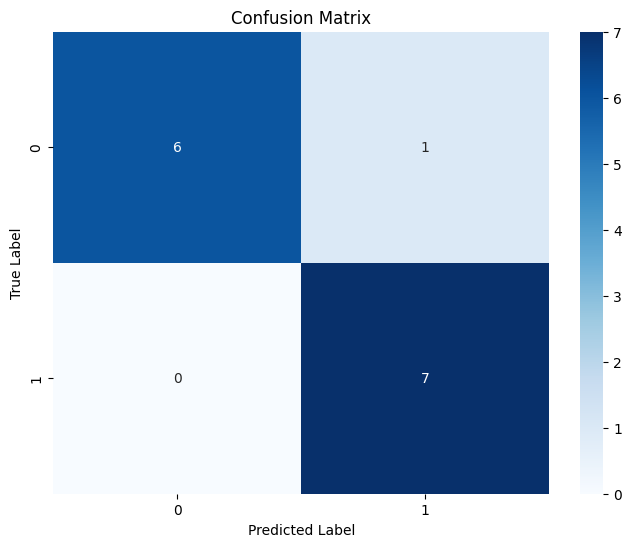

In [48]:
cm = confusion_matrix(y_true, y_pred)

#confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Data Segmentation for more data

In [8]:
#to increase the data we are spliting the signals into small parts of length 5000 points each. 

def split_signals(X, y, segment_length, overlap=0):
    n_samples, n_channels, n_timepoints = X.shape
    
    stride = segment_length - overlap
    n_segments = ((n_timepoints - segment_length) // stride) + 1
    
    X_segmented = np.zeros((n_samples * n_segments, n_channels, segment_length, 1))
    y_segmented = np.zeros(n_samples * n_segments)
    
    for i in range(n_samples):
        for j in range(n_segments):
            start = j * stride
            end = start + segment_length
            X_segmented[i*n_segments + j, :, :, 0] = X[i, :, start:end]
            y_segmented[i*n_segments + j] = y[i]
    
    return X_segmented, y_segmented

In [9]:
segment_length = 5000
overlap = 500  #overlap helps to keep the important features at starting or ending gets noticed


X_segmented, y_segmented = split_signals(X, y, segment_length, overlap)

In [10]:
y_segmented.shape

(420,)

# EEGnet Model

Reference : https://arxiv.org/abs/1611.08024

Github: https://github.com/aliasvishnu/EEGNet

I took the help of official EEGnet code which was implented in pytorch, converted it into tensorflow. 

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.metrics import precision_score, recall_score, f1_score

In [16]:
def EEGNet(nb_classes, Chans=64, Samples=128, 
           dropoutRate=0.5, kernLength=64, F1=8, 
           D=2, F2=16, norm_rate=0.25, dropoutType='Dropout'):
    
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    input1 = Input(shape=(Chans, Samples, 1))
    block1 = Conv2D(F1, (1, kernLength), padding='same',
                    input_shape=(Chans, Samples, 1),
                    use_bias=False)(input1)
    block1 = BatchNormalization()(block1)
    block1 = DepthwiseConv2D((Chans, 1), use_bias=False, 
                              depth_multiplier=D,
                              depthwise_constraint=max_norm(1.))(block1)
    block1 = BatchNormalization()(block1)
    block1 = Activation('elu')(block1)
    block1 = AveragePooling2D((1, 4))(block1)
    block1 = dropoutType(dropoutRate)(block1)
    block2 = SeparableConv2D(F2, (1, 16),
                             use_bias=False, padding='same')(block1)
    block2 = BatchNormalization()(block2)
    block2 = Activation('elu')(block2)
    block2 = AveragePooling2D((1, 8))(block2)
    block2 = dropoutType(dropoutRate)(block2)
        
    flatten = Flatten(name='flatten')(block2)
    dense = Dense(nb_classes, name='dense', 
                  kernel_constraint=max_norm(norm_rate))(flatten)
    softmax = Activation('softmax', name='softmax')(dense)
    return Model(inputs=input1, outputs=softmax)

In [11]:
X_segmented = X_segmented.reshape(X_segmented.shape[0], X_segmented.shape[1], X_segmented.shape[2], 1)

In [12]:
X_segmented.shape

(420, 19, 5000, 1)

In [13]:
y_segmented.shape

(420,)

In [13]:
print("Shape of y:", y_segmented.shape)
print("First few elements of y:", y_segmented[:5])

Shape of y: (420,)
First few elements of y: [0. 0. 0. 0. 0.]


In [14]:
#converting the y_segmented in to catagorical i.e 2d
import numpy as np
from tensorflow.keras.utils import to_categorical

if len(y_segmented.shape) == 1:
    if y_segmented.dtype == object:
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y_segmented = le.fit_transform(y_segmented)
    y_segmented = to_categorical(y_segmented)

print("Shape of y after conversion:", y_segmented.shape)
print("First few elements of y after conversion:", y_segmented[:5])

Shape of y after conversion: (420, 2)
First few elements of y after conversion: [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_segmented, y_segmented, test_size=0.2, random_state=42)

In [20]:
n_classes = y_segmented.shape[1]  #binary classification- rest vs task
n_channels = X_segmented.shape[1]
n_timepoints = X_segmented.shape[2]

In [21]:
model = EEGNet(nb_classes=n_classes, Chans=n_channels, Samples=n_timepoints)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 19, 5000, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 19, 5000, 8)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 19, 5000, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 5000, 16)    │           304 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 5000, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 5000, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 1250, 16)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1250, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 1250, 16)    │           512 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 1250, 16)    │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 1250, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 156, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 156, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2496)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,994 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,482 (25.32 KB)

 Trainable params: 6,402 (25.01 KB)

 Non-trainable params: 80 (320.00 B)

In [23]:
history = model.fit(X_train, y_train, batch_size=8, epochs=200, 
                    validation_split=0.2, verbose=1)

Epoch 1/200
 8/34 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5212 - loss: 0.7494

I0000 00:00:1720344306.036079     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720344306.058054     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.4923 - loss: 0.7243

W0000 00:00:1720344313.620961     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


34/34 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - accuracy: 0.4921 - loss: 0.7241 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6465 - loss: 0.5966 - val_accuracy: 0.4265 - val_loss: 0.7056
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7756 - loss: 0.5266 - val_accuracy: 0.4559 - val_loss: 0.7196
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7785 - loss: 0.5114 - val_accuracy: 0.3971 - val_loss: 0.7326
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8154 - loss: 0.4729 - val_accuracy: 0.4412 - val_loss: 0.7550
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8618 - loss: 0.4518 - val_accuracy: 0.4706 - val_loss: 0.7549
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8052 - loss: 0.4768 - val_accuracy: 0.4118 - val_loss: 0.7486
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8462 - loss: 0.4671 - val_accuracy: 0.4706 - val

In [27]:
#testing model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.7976


In [31]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [29]:
#calculate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.7995
Recall: 0.7976
F1-score: 0.7975


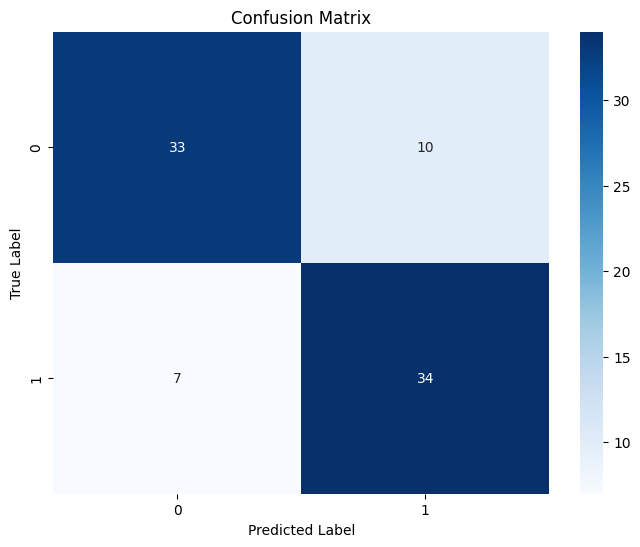

In [35]:
cm = confusion_matrix(y_true, y_pred)

#confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# TSception

Referance : https://arxiv.org/abs/2104.02935

Github : https://github.com/yi-ding-cs/TSception/blob/main/code/networks.py

This was also was in pytorch i converted the code in tf.

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Dropout, Dense, Flatten, Concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [11]:
def TSception(input_shape, num_classes, dropout_rate=0.5, l2_reg=1e-3):
    input_layer = Input(shape=input_shape)
    conv1 = Conv2D(32, (1, 7), padding='same', activation='relu', kernel_regularizer=l2(l2_reg))(input_layer)
    conv2 = Conv2D(32, (1, 5), padding='same', activation='relu', kernel_regularizer=l2(l2_reg))(input_layer)
    conv3 = Conv2D(32, (1, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg))(input_layer)
    
    concat1 = Concatenate(axis=-1)([conv1, conv2, conv3])
    bn1 = BatchNormalization()(concat1)
    spatial_conv = Conv2D(32, (input_shape[0], 1), activation='relu', kernel_regularizer=l2(l2_reg))(bn1)
    conv4 = Conv2D(64, (1, 7), padding='same', activation='relu', kernel_regularizer=l2(l2_reg))(spatial_conv)
    conv5 = Conv2D(64, (1, 5), padding='same', activation='relu', kernel_regularizer=l2(l2_reg))(spatial_conv)
    conv6 = Conv2D(64, (1, 3), padding='same', activation='relu', kernel_regularizer=l2(l2_reg))(spatial_conv)
    
    concat2 = Concatenate(axis=-1)([conv4, conv5, conv6])
    bn2 = BatchNormalization()(concat2)
    gap = AveragePooling2D(pool_size=(1, bn2.shape[2]))(bn2)
    
    flatten = Flatten()(gap)
    dropout = Dropout(dropout_rate)(flatten)
    output_layer = Dense(num_classes, activation='softmax')(dropout)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [15]:
input_shape = (X_segmented.shape[1],X_segmented.shape[2], 1)
num_classes = y_segmented.shape[1]

In [16]:
model = TSception(input_shape, num_classes)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 19, 5000,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 19, 5000,  │        256 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 19, 5000,  │        192 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 19, 5000,  │        128 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 19, 5000,  │          0 │ conv2d[0][0],     │
│ (Concatenate)       │ 96)               │            │ conv2d_1[0][0],   │
│                     │                   │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 19, 5000,  │        384 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 1, 5000,   │     58,400 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 1, 5000,   │     14,400 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 1, 5000,   │     10,304 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 1, 5000,   │      6,208 │ conv2d_3[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 1, 5000,   │          0 │ conv2d_4[0][0],   │
│ (Concatenate)       │ 192)              │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 5000,   │        768 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 1, 1, 192) │          0 │ batch_normalizat… │
│ (AveragePooling2D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 192)       │          0 │ average_pooling2… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 192)       │          0 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2)         │        386 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 91,426 (357.13 KB)

 Trainable params: 90,850 (354.88 KB)

 Non-trainable params: 576 (2.25 KB)

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, 
                    validation_split=0.2, verbose=1)

Epoch 1/100
1/9 ━━━━━━━━━━━━━━━━━━━━ 2:44 21s/step - accuracy: 0.4375 - loss: 0.9088

I0000 00:00:1720348142.046012     275 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.5800 - loss: 0.8421 - val_accuracy: 0.5588 - val_loss: 0.8496
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7543 - loss: 0.6598 - val_accuracy: 0.5441 - val_loss: 0.8380
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.7711 - loss: 0.6190 - val_accuracy: 0.5441 - val_loss: 0.8200
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.7935 - loss: 0.6002 - val_accuracy: 0.5441 - val_loss: 0.8121
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.8370 - loss: 0.5460 - val_accuracy: 0.5294 - val_loss: 0.8564
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8594 - loss: 0.5083 - val_accuracy: 0.5294 - val_loss: 0.9159
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.8761 - loss: 0.4838 - val_accuracy: 0.5294 - val_loss: 1.0772
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8663 - loss: 0.4760 - val_accuracy: 0.5294 - val_loss: 1.120

In [22]:
#calculating accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.8333


In [23]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step


In [26]:
#calculate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.8638
Recall: 0.8333
F1-score: 0.8305


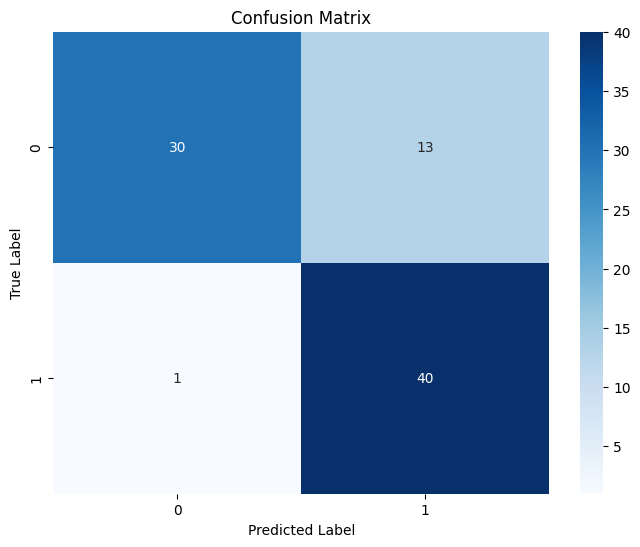

In [29]:
cm = confusion_matrix(y_true, y_pred)

#confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**Results: **

***EEGnet:***

Test accuracy: 0.7976

Precision: 0.7995

Recall: 0.7976

F1-score: 0.7975

***TSception: ***

Test accuracy: 0.8333

Precision: 0.8638

Recall: 0.8333

F1-score: 0.8305

TSception appears to have outperformed EEGNet. The reasons might be TSception is specifically designed for time series data, including EEG signals. It uses inception blocks with multiple kernel sizes to capture temporal features at different scales, which can be particularly effective for EEG data. 
Also while doing feature extraction TSception's uses multiple kernel sizes in its inception blocks which allows it to capture both short-term and long-term dependencies in the eeg signals.

